In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn')  # to get seaborn scatter plot

# read the csv file to extract data
def float_to_int(x): # function to convert float to integer (i.e.: 2014.0 to 2014)
    split_string = x.split(".") # splits input argument at decimal point, returns an array (i.e.: 2014.0 to [2014, 0])
    substring = split_string[0] # takes the value at the index 0 of new array (i.e.: 2014 of [2014, 0])
    if len(substring) > 0: # if the length of the substring is greater then 0 (which means, in the case that there is data in that cell) 
        return int(substring) # convert the substring to an integer, and return that integer
    else: # otherwise (in the case that there is no data in that cell)
        return '' # return an empty string


df = pd.read_csv('cleaned.csv', converters={'calendar_year': float_to_int})
# boston_filter = df[df.city == "Boston"]
# calendar_year = boston_filter['calendar_year']
# amount_awarded = boston_filter['amount_awarded']

# plt.scatter(calendar_year, amount_awarded, s=100, alpha=0.6, edgecolor='black', linewidth=1)
# plt.title('Boston City Payouts from 2010-2020')
# plt.xlabel('Year')
# plt.ylabel('Amount Awarded')

# plt.tight_layout()
# plt.show()

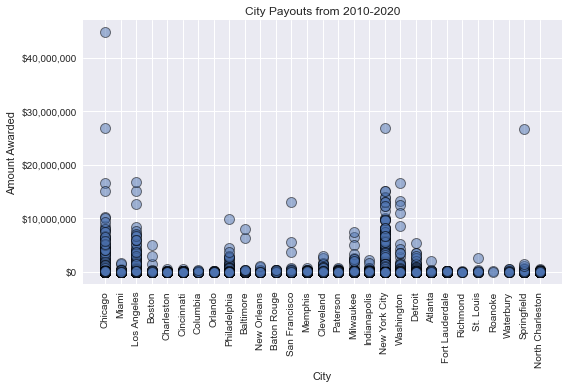

In [24]:
fig, ax = plt.subplots()
plt.scatter(df.city, df.amount_awarded, s=100, alpha=0.5, edgecolor='black', linewidth=1)

plt.title('City Payouts from 2010-2020')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Amount Awarded')
ax.yaxis.set_major_formatter('${x:,.0f}') 


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Top 5 Highest Paying Cities From 2010 - 2020')

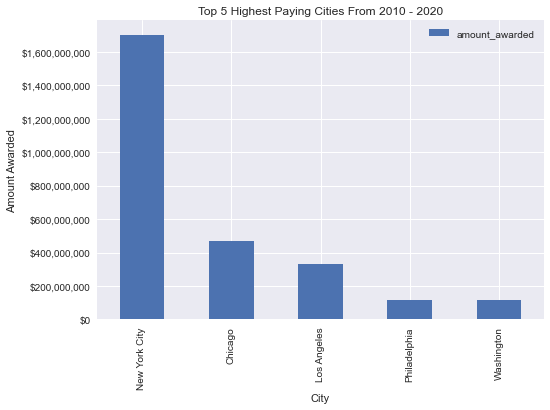

In [3]:
df2 = df.groupby(['city'], as_index=False)['amount_awarded'].sum().round()
df2.sort_values(by=['amount_awarded'], ascending=False, inplace=True)
df3 = df2.head()
df4 = df3.plot(x="city", y=["amount_awarded"], kind="bar")
df4.yaxis.set_major_formatter('${x:,.0f}') # inserts $ value with commas and 0 zeros after the decimal point on the y axis (amount awarded)
df4.set_xlabel('City')
df4.set_ylabel('Amount Awarded')
plt.title('Top 5 Highest Paying Cities From 2010 - 2020')

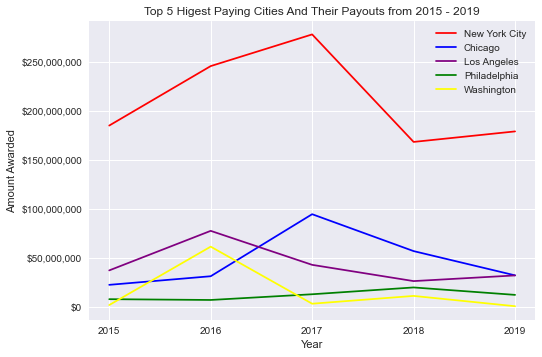

In [4]:
ax = plt.gca()

nyc_filter = df[df.city == "New York City"] # filters through the csv and pulls all the data with the string "Detroit" in the city column
nyc_sum = nyc_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
nyc_5 = nyc_sum.drop([0, 1, 2, 3, 4])
chicago_filter = df[df.city == "Chicago"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
chicago_sum = chicago_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
chicago_5 = chicago_sum.drop([0, 1, 2, 3, 4])
la_filter = df[df.city == "Los Angeles"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
la_sum = la_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
la_5 = la_sum.drop([0, 1, 2, 3, 4, 10])
philly_filter = df[df.city == "Philadelphia"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
philly_sum = philly_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
philly_5 = philly_sum.drop([0, 1, 2, 3, 4, 5])
washington_filter = df[df.city == "Washington"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
washington_sum = washington_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round() # calculated the sum of the amount awarded for each calendar year and rounded it (used to get flat numbers)
washington_5 = washington_sum.drop([0, 1, 2, 3, 4, 5, 6])

nyc_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='red', label='New York City')
chicago_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='blue', label='Chicago')
la_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='purple', label='Los Angeles')
philly_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='green', label='Philadelphia')
washington_5.plot(kind='line',x = 'calendar_year',y = 'amount_awarded',ax=ax,color='yellow', label='Washington')
ax.set_xlabel('Year')
ax.set_xticks([2015,2016,2017,2018,2019])
ax.set_ylabel('Amount Awarded')
plt.title('Top 5 Higest Paying Cities And Their Payouts from 2015 - 2019')
ax.yaxis.set_major_formatter('${x:,.0f}') # inserts $ value with commas and 0 zeros after the decimal point on the y axis (amount awarded)
plt.show()

In [5]:
population = pd.read_csv('population_data.csv')

In [6]:
population

,id,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,city_name
0,1,8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0,"New York City, New York"
1,2,3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0,"Los Angeles, California"
2,3,2695598,2695652,2697477,2708114.0,2719141.0,2725731.0,2727066.0,2724344.0,2716723.0,2711069.0,2701423.0,2693976.0,"Chicago, Illinois"
3,6,1526006,1526012,1528283,1540466.0,1551824.0,1558313.0,1565460.0,1571065.0,1576051.0,1580601.0,1583592.0,1584064.0,"Philadelphia, Pennsylvania"
4,16,805235,805184,805505,815650.0,828876.0,839572.0,850750.0,863010.0,871512.0,878040.0,880696.0,881549.0,"San Francisco, California"
5,17,820445,820457,821579,827664.0,835499.0,844696.0,850164.0,853714.0,859049.0,863478.0,870960.0,876384.0,"Indianapolis (balance), Indiana"
6,20,601723,601767,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0,"Washington, District of Columbia"
7,21,617594,617792,621048,630505.0,642955.0,653002.0,662855.0,670491.0,679848.0,687788.0,691147.0,692600.0,"Boston, Massachusetts"
8,24,713777,713898,711131,705118.0,700183.0,691868.0,682609.0,679410.0,677143.0,674631.0,672977.0,670031.0,"Detroit, Michigan"
9,28,646889,651873,652326,655341.0,658786.0,657146.0,654990.0,654106.0,652548.0,650878.0,651104.0,651073.0,"Memphis, Tennessee"


In [16]:
data = [['New York City', 179130258, 8336817], ['Los Angeles', 32116660, 3979576], ['Chicago', 32190160, 2693976], ['Philadelphia', 12264802, 1584064], ['San Francisco', 18256758, 881549], ['Indianapolis', 2715264, 876384], ['Washington', 695500, 705749], ['Boston', 115000, 692600]]
pop2019_df = pd.DataFrame(data, columns = ['city', 'total_payout', 'population'])
pop2019_df

,city,total_payout,population
0,New York City,179130258,8336817
1,Los Angeles,32116660,3979576
2,Chicago,32190160,2693976
3,Philadelphia,12264802,1584064
4,San Francisco,18256758,881549
5,Indianapolis,2715264,876384
6,Washington,695500,705749
7,Boston,115000,692600


In [15]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sf_filter = df[df.city == "Boston"] # filters through the csv and pulls all the data with the string "Atlanta" in the city column
sf_sum = sf_filter.groupby(['calendar_year'], as_index=False)[['amount_awarded']].sum().round()
sf_sum

,calendar_year,amount_awarded
0,2010,161950.00
1,2011,45500.00
2,2012,1989000.00
3,2013,3491140.00
4,2014,5175000.00
5,2015,359892.00
6,2016,208000.00
7,2017,70000.00
8,2018,290000.00
9,2019,115000.00


,city,amount_awarded
17,New York City,1704120487.00
5,Chicago,467586464.00
12,Los Angeles,329925622.00
21,Philadelphia,116839475.00
27,Washington,114829449.00
9,Detroit,57702989.00
15,Milwaukee,40017822.00
25,Springfield,32846089.00
7,Cleveland,28573475.00
24,San Francisco,27873298.00
